# Theory

Fixing a deterministic $\theta \in [0, 2\pi]$ and a random variable $\Theta \sim \mathcal{D}$ we can calculate the conditional density as
$$\rho_{\theta} = 
\mathbb{E}[p(\theta, \Theta)] = 
c \cdot \int_{[0, 1]} x f_{S_{\theta}}(x) dx$$

For $r \leq 0.5$ we can express $f_{S_{\vartheta}}$ as

$$f_{S_{\vartheta}}(t) = \frac{2l\lambda e^{-\lambda \theta}}{1 - e^{-2\pi\lambda}} \cdot
\begin{cases}
\cosh\big(\lambda l(1-t)\big) & \text{, for } t \geq 1-\frac{1}{l}\min \{ \theta, 2\pi - \theta \} \\
\cosh\big(\lambda (\pi - l(1-t)\big) \cdot e^{\operatorname{sgn}\big(\theta - l(1-t)\big) \lambda \pi}  & \text{, for } t \leq 1-\frac{1}{l}\min \{\theta, 2\pi - \theta \} \; .
\end{cases}
$$

For $r \leq 0.5$ this simplifies to
\begin{align}
\rho_{\theta} &= c\cdot l \cdot \int_0^1 x f_{D_{\theta}}\big(l \cdot (1-x)\big) dx \\
&= c \cdot \int_0^l \left(1-\frac{x}{l}\right) f_{D_{\theta}}(x) dx \\
&= c \cdot \left( F_{D_{\theta}}(l) -  \frac{1}{l}\int_0^l x f_{D_{\theta}}(x) dx \right) \, ,
\end{align}

with $f_{D_{\theta}} = $

# Proof of Concept

In [1]:
import numpy as np
import ringity as rng
import networkx as nx

In [2]:
seed = 1234
np.random.seed(seed = seed)

N = 2**7

beta = np.random.uniform()
r = np.random.uniform(0, 0.5)
c = np.random.uniform()

G, thetas = rng.network_model(N = N, beta = beta, r = r, c = c, return_positions = True, random_state = seed)

In [3]:
bb1 = rng.networkmeasures.centralities.current_flow(G)
bb2 = nx.edge_current_flow_betweenness_centrality(G)

In [4]:
truth_values = [np.isclose(value, bb1[(min(edge), max(edge))]) for edge, value in bb2.items()]
print(all(truth_values))

True


In [5]:
G1 = nx.erdos_renyi_graph(50, 0.3)
G2 = nx.erdos_renyi_graph(2**5, 2**(-2))

In [6]:
bb1 = rng.networkmeasures.centralities.current_flow(G1)
bb2 = rng.networkmeasures.centralities.current_flow(G2)

In [7]:
all(truth_values)

True

---

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from ringity.generators.utils import distribution_functions as dfuncs

In [9]:
def pdf_delay(t, rate):
    norm = rate / (1 - np.exp(-2*np.pi*rate)) 
    value = np.exp(-t*rate)
    support = 1/4 * (1 + np.sign(t)) * (1 + np.sign(2*np.pi - t))
    return norm * value * support

def pdf_conditional_absolute_distance(t, rate, theta):
    norm = rate / (1 - np.exp(-2*np.pi*rate)) 
    support = 1/4 * (1 + np.sign(t)) * (1 + np.sign(theta - t))
    
    value1 = np.exp(-rate*(theta + t))
    support1 = 1/2 * (1 + np.sign(2*np.pi - theta - t))
    
    value2 = np.exp(-rate*(theta - t))
    support2 = 1/2 * (1 + np.sign(2*np.pi - theta + t))
    
    return norm * (value1*support1 + value2*support2) * support

In [10]:
rate = np.random.uniform(0, 1)

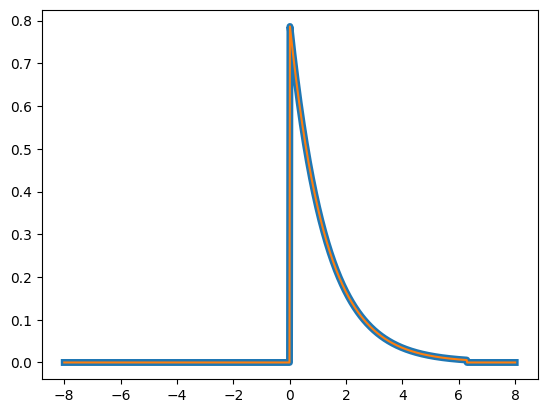

In [11]:
t = np.linspace(-8, 8, 2**10)

fig, ax = plt.subplots()
ax.plot(t, pdf_delay(t, rate = rate), linewidth = 5)
ax.plot(t, dfuncs.pdf_delay(t, parameter = rate, parameter_type = 'rate'))

In [12]:
theta = np.random.uniform(0, 2*np.pi)

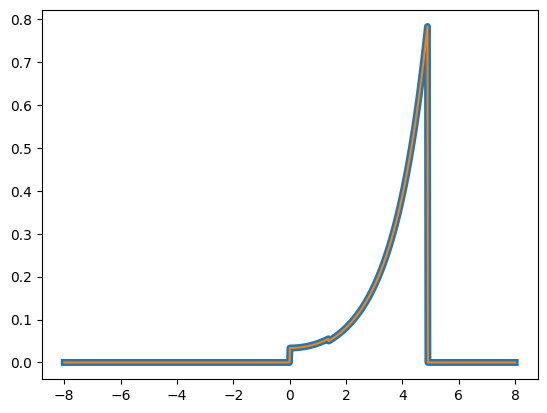

In [13]:
t = np.linspace(-8, 8, 2**10)

fig, ax = plt.subplots()
ax.plot(t, pdf_conditional_absolute_distance(t, rate = rate, theta = theta), linewidth = 5)
ax.plot(t, dfuncs.pdf_conditional_absolute_distance(t, theta = theta, parameter = rate, parameter_type = 'rate'))

In [14]:
%%timeit

pdf_delay(t, rate = rate)

16.7 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
%%timeit

dfuncs.pdf_delay(t, parameter = rate, parameter_type = 'rate')

14.5 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
def test(t, theta, rate):
    normalization = rate / (1-np.exp(-2*np.pi*rate))
    values1 = np.exp(-rate/2 * (theta + t + 2*np.pi - abs(theta + t - 2*np.pi)))
    values2 = np.exp(-rate/2 * (theta - t + abs(theta - t))) / 2 * (1 + np.sign(t + theta - 2*np.pi))
    return normalization * (values1 + values2)

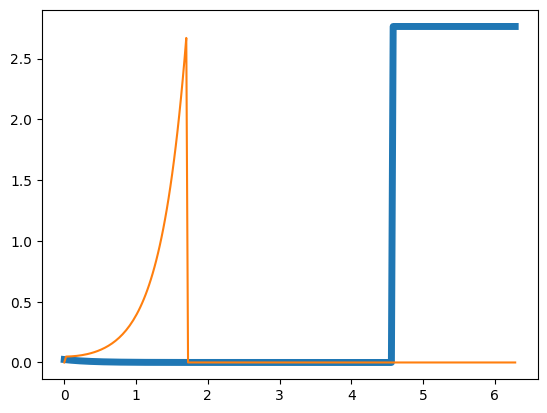

In [17]:
theta = np.random.uniform(0, 2*np.pi)
rate = np.random.uniform(0, 10)

t = np.linspace(0, 2*np.pi, 2**8)
fig, ax = plt.subplots()
ax.plot(t, test(t, theta = theta, rate=rate), linewidth = 5)
ax.plot(t, dfuncs.pdf_conditional_absolute_distance(t, theta = theta, parameter=rate, parameter_type='rate'))

In [18]:
rate

2.764642551430967

In [19]:
theta

1.7127498523576983

In [20]:
import numpy as np

from scipy.integrate import quad
from ringity.generators.utils import distribution_functions as dfuncs

In [21]:
for i in range(2**4):
    theta = np.random.uniform(0, 2*np.pi)

    rate = np.random.uniform(0, 10)
    r = np.random.uniform(0, 0.5)
    l = 2*r*np.pi
    
    F = dfuncs.cdf_conditional_circular_distance(l, 
                                    theta = theta,
                                    parameter = rate, 
                                    parameter_type = 'rate')

    int1 = F - 1/l * quad(lambda x : x * dfuncs.pdf_conditional_circular_distance(x, 
                                    theta = theta,
                                    parameter = rate, 
                                    parameter_type = 'rate'), 0, l)[0]

    int2 = l * quad(lambda x : x * dfuncs.pdf_conditional_circular_distance(l * (1-x), 
                                    theta = theta,
                                    parameter = rate, 
                                    parameter_type = 'rate'), 0, 1)[0]
    
    print(np.isclose(int1, int2))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
print(int1)
print(int2)

0.298368944511639
0.2983689445116391


In [23]:
import numpy as np
import pandas as pd
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter
from scipy.spatial.distance import squareform

In [37]:
seed = 1234
np.random.seed(seed = seed)

N = 2**9

beta = np.random.uniform(0.5, 1)
r = np.random.uniform(0, 0.5)
c = 1

G, thetas = rng.network_model(N = N, beta = beta, r = r, c = c, return_positions = True, random_state = seed)

In [38]:
rate = rng.networkmodel.param_utils.beta_to_rate(beta)

In [39]:
rho = rng.networkmodel.param_utils.get_density(response = r, 
                                             coupling = c, 
                                             rate = rate)
print(nx.density(G))
print(rho)

0.4662350171232877
0.48690267174307256


In [40]:
s = (pd.Series(dict(G.degree)).
        rename(dict(enumerate(thetas))).
        sort_index()) / (N-1)

In [41]:
def expected_conditional_similarity(theta, rate, a):
    if np.isclose(rate, 0, atol=1e-7):
        return a
    
    rprime = 2*np.pi*a
    
    if theta < np.pi:
        if theta <= rprime:
            norm = 1 / (1 - np.exp(-2*np.pi*rate)) / (rprime*rate)
            
            theta_term = -theta*rate * (1 - np.exp(-2*np.pi*rate))
            
            term1  = 1 - 2*np.exp(-rate*theta)
            term21 =  np.exp(-rate*theta)*(np.exp(-rprime*rate) + np.exp((rprime - 2*np.pi)*rate))
            term22 = -np.exp(-rprime)
            
            return norm*(term1 + term21 + term22 + theta_term) + 1
        else:
            theta_term = np.exp(-rate*theta) / (1 - np.exp(-2*np.pi*rate))
            alpha_term = (np.cosh(rate*rprime) - 1) / (rprime*rate)
            return 2 * theta_term * alpha_term
        
    else:
        norm = 2*rate*np.exp(-rate*theta) / (1 - np.exp(-2*np.pi*rate))
        
        def undef_int(t):
            return (np.exp(np.pi*rate)*(np.cosh((np.pi - t)*rate) + (-2*a*np.pi + t)*rate*np.sinh((np.pi - t)*rate)))/(2*a*np.pi*rate**2)
        
        if 2*np.pi - theta <= 2*np.pi*a:
            term1 = (-1 + np.cosh((2*np.pi - theta)*rate) + (2*(-1 + a)*np.pi + theta)*rate*np.sinh((2*np.pi - theta)*rate))/(2*a*np.pi*rate**2)
            term2 = undef_int(2*np.pi*a) - undef_int(2*np.pi - theta)
            return norm*term1 + norm*term2
        else:
            return norm*(np.sinh(a*np.pi*rate)**2)/(a*np.pi*rate**2)

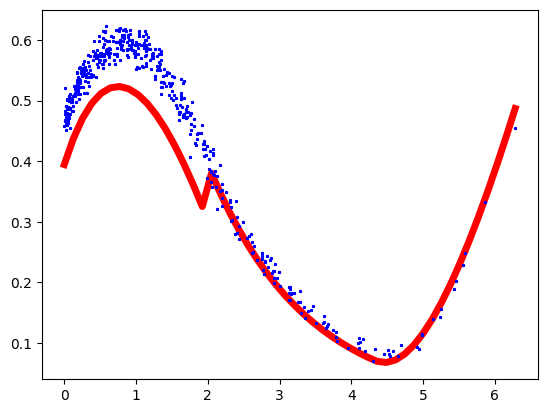

In [42]:
x = np.linspace(0, 2*np.pi, 50)
simis = [c*expected_conditional_similarity(theta=theta, rate=rate, a=r)
                    for theta in x]

plt.plot(x, simis, linewidth = 5, c = 'red')
plt.plot(s.index, s.values, '*', c = 'blue', markersize = 2)

In [26]:
def conditional_similarity(t, theta, rate, r):
    l = 2*r*np.pi
    
    normalization = 2*l*rate*np.exp(-rate*theta) / (1 - np.exp(-2*np.pi*rate))
    
    condition = (t >= 1 - min(theta, 2*np.pi-theta) / l)
    
    value = np.where(condition, 
                    np.cosh(rate*l*(1-t)),
                    np.cosh(rate*(np.pi - l*(1-t))) * np.exp(np.sign(theta-l*(1-t))* rate*np.pi))
    
    return value * normalization

In [36]:
x = np.linspace(0, 2*np.pi, 50)
quad(lambda t : c*t*conditional_similarity(t, theta=x[10], rate=rate, r=r), 0, 1)[0]

0.4975632796644498

In [34]:
c*expected_conditional_similarity(theta=x[10], rate=rate, a=r)

0.4750773054119808

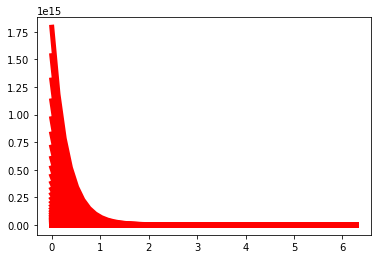

In [30]:
x = np.linspace(0, 2*np.pi, 50)
simis = [c*conditional_similarity(theta=theta, rate=rate, r=r)
                    for theta in x]

plt.plot(x, simis, linewidth = 5, c = 'red')

In [11]:
np.cosh(-rate*2*np.pi*r), np.cosh(rate*2*np.pi*r)

(272.1180293226087, 272.1180293226087)

In [12]:
np.cosh(beta), np.cosh(-beta)

(1.018395976871026, 1.018395976871026)

In [67]:
def similarity_from_absdist(abs_dist, l):
    dist = np.where(abs_dist < np.pi, abs_dist, 2*np.pi - abs_dist)
    s = (l - dist) / l
    return np.clip(s, 0, 1)

def similarity_from_absdist2(abs_dist, l):
    dist = np.pi - abs(abs_dist - np.pi)
    s = (l - dist) / l
    return s

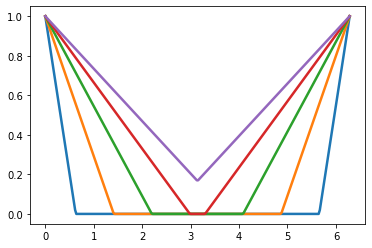

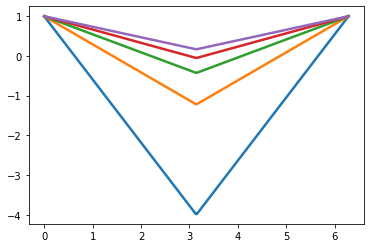

In [68]:
l_list = 2*np.pi * np.linspace(0.1, 0.6, 5)

x = np.linspace(0, 2*np.pi, 2**8)

fig, ax = plt.subplots()
for l in l_list:
    y = similarity_from_absdist(x, l)
    ax.plot(x, y, linewidth = 2.5)
    
fig, ax = plt.subplots()
for l in l_list:
    y = similarity_from_absdist2(x, l)
    ax.plot(x, y, linewidth = 2.5)

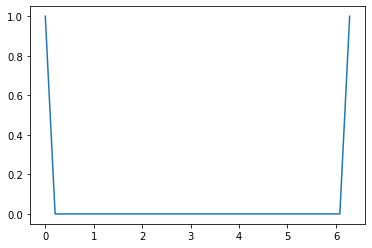

In [21]:
def similarity_from_absdist(abs_dist, l):
    dist = np.where(abs_dist < np.pi, abs_dist, 2*np.pi - abs_dist)
    s = (l - dist) / l
    return np.clip(s, 0, 1)

In [56]:
x = np.linspace(-3, 3, 100)

y = np.where(np.abs(x) - 0.5*abs(x) > 0, 0)

plt.plot(x, y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()